In [1]:

from collections import Counter
import csv
import dgl.data
import torch
import torch.nn as nn
import torch.nn.functional as F
import dgl.function as fn
from torch.distributions import Categorical
import matplotlib.pyplot as plt
from math import log2
%run MoleculeGenerator2.ipynb






Using backend: pytorch


RDKit is not installed, which is required for utils related to cheminformatics


In [8]:
# drugs = pandas.read_csv('./SmallDrug.csv',error_bad_lines=False,delimiter=';')
# smiles_values = drugs['Smiles'].values

In [7]:
# len(smiles_values)

38683

In [4]:
class MolStat():
    '''
    class for gathering statistics over a collection of molecules
    '''
    def __init__(self,smiles):
        self.smiles = smiles        
        self.atom_list = ['N','C','O','S','F','Cl','Na','P','Br','Si','B','Se','K', 'Aro']
        self.action_keys = ['atom_per_mol','bonds_per_atom_type','bonds_per_atom', 
                            'degree_per_atom_type','degree_per_atom']
        
        self.cache = dict.fromkeys(self.action_keys,[None,None])
                
    
    def __mol_query_atom_type(self, mol, atom_func):
        # higher order function for gathering atom wise stats
        #returns dictionary with atom types as keys and list containing different stats as values
        atom_type_dict = {atom: [] for atom in atom_list}       
        for atom in mol.GetAtoms():
            stat = atom_func(atom)
            atom_type_dict[atom.GetSymbol()].append(stat)
    
        return atom_type_dict
            
    
    def __degree_per_atom(self,atom):
        return atom.GetDegree()
    def __bonds_per_atom(self,atom):
        return atom.GetExplicitValence()
    def __in_aro_ring(self,atom):
        return atom.GetIsAromatic()
    
    def __map(self,atom_func_name,smiles):
        #function which maps over each molecule
        #func: (mol -> stat)
        stats = []
        atom_func = self.__func_name_parser(atom_func_name)
        
        for smile in smiles:
            try:
                mol = Chem.MolFromSmiles(smile)
                stat = self.__mol_query_atom_type(mol,atom_func)
                stats.append(stat)
            except:
                print('bad smile')
            
            
        self.cache[atom_func_name][0] = stats
        
    def __sum_states_all(self,stat):
        if self.cache[stat][0] == None:
            print('calculating '+ stat + 'on initial smiles now')
            self.GetStats(__func_name_parser(stat))
        else:
            print('using cached ' + stat)
            
        hist = atom_type_dict = {atom: [] for atom in atom_list} 
        for mol_dict in self.cache[stat][0]:
            for atom in self.atom_list:
                hist[atom] += mol_dict[atom]
        
                
        self.cache[stat][1] = hist
                
        
    def __func_name_parser(self,func_name):
        if func_name == 'degree_per_atom_type':
            return self.__degree_per_atom
        if func_name == 'bonds_per_atom_type':
            return self.__bonds_per_atom
        
    def GetDeviation(self,stat):
        return
    
    def GetStats(self,atom_func_name,smiles=None):
        if any(smiles == None):
            smiles = self.smiles
        self.__map(atom_func_name,smiles)
        
    def GetHist(self,stat):
        self.__sum_states_all(stat)
        
    def GetHistPlot(self,stat,atom_type):
        if self.cache[stat][1] == None:
            self.__sum_states_all(stat)
      
        plt.hist(self.cache[stat][1][atom_type], density=True, bins=4)
            
            
        
        

In [411]:
# molStat_container = MolStat('fra')

In [412]:
# molStat_container.GetStats('degree_per_atom_type',smiles_values[0:200])

['CCCCC(=O)O.N' 'Cn1cccc/c1=N\\C1CC1' 'NCc1ccccc1C(=O)O'
 'OCc1cccc2ccccc12' 'CC(C)(C)c1ccc(C(C)(C)C)cc1' '[O-][S+]1Sc2ccccc2S1'
 'O=C(O)[C@H]1NC(=O)[C@H](O)[C@@H](O)[C@H]1O' 'NC(CCCCc1nnn[nH]1)C(=O)O'
 'O=C1C=Cc2c(O)ccc3cccc1c23' 'CCO/N=C/C(O)CNC(C)C' 'CCN[C@@H](C)Cc1ccccc1'
 'c1cn(CC2CCCCC2)cn1' 'CCCCCCC#CC(=O)OC' 'N#CCc1ccccc1'
 'NCCC[C@H](NN)C(=O)O' 'Cc1ccc(F)cc1' 'NC[C@H]1C[C@@H]1c1ccc(F)cc1Cl'
 'Cc1cccnc1CO' 'O=C1CNC(=O)c2ccccc2N1' 'c1ccc2c(c1)CCNC2C1CC1'
 'Cc1cccc2cccnc12' 'Cc1cc(C#N)cc(C)c1O' 'O=C(N[C@H]1COC1=O)c1ccccc1'
 'CNCCS(=O)(=O)[O-].[Na+]' 'Cc1noc2c1[C@H]1CC[C@@H](CC2)N1'
 'CC1=CC(C)C(C=O)C(C)C1' 'CCOC(=O)P(=O)(O)OCC'
 'CC(N)[C@@H]1C[C@H]2CC[C@@H]1C2' 'C[C@@H]1O[C@H](C[N+](C)(C)C)CO[C@@H]1C'
 'COC(=O)[C@@H](N)CCCCN' 'C[s+]1c2ccccc2c2ccccc21'
 'C[N+](C)(C)C[C@H]1CCCC(=O)C1' 'CCCCCN1CCCN=C1/C=N/O' 'CC(=O)OCC=C(C)C'
 'CC(C)OP(C)(=O)OC(C)C' 'CCCC1CCCC(=O)O1' 'COc1ccc(-c2cc(O)[nH]n2)cc1'
 'CC1=CC(C(C)C)NC(=S)N1' 'CC(C)(C)Sc1ccc(N)nc1' 'Cc1ccccc1NCC1=NCCN1'
 'O=CCCC1([N+](=O)

In [400]:
# molStat_container.GetHist('degree_per_atom_type')

using cached degree_per_atom_type


In [402]:
# molStat_container.cache['degree_per_atom_type'][1]['C']

[1,
 2,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 1,
 4,
 1,
 1,
 3,
 2,
 2,
 3,
 4,
 1,
 1,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 3,
 1,
 2,
 2,
 3,
 2,
 3,
 1,
 1,
 1,
 2,
 3,
 1,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 1,
 3,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 3,
 1,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 3,
 2,
 2]

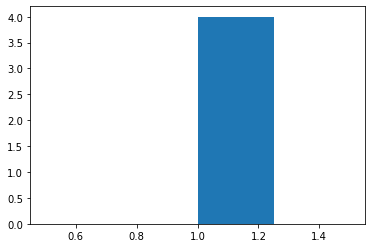

In [405]:
# molStat_container.GetHistPlot('degree_per_atom_type','F')

In [406]:
# mol = Chem.MolFromSmiles('CCCCC(=O)O.N')

In [407]:
# for atom in mol.GetAtoms():
#     atom.GetIsAromatic

In [233]:
# mol_atoms_list = []
# for smile in smiles_values:
#     atom_list = []
#     try:
#         ok = True
#         mol = Chem.MolFromSmiles(smile)
#         for atom in mol.GetAtoms():
#             symbol = atom.GetSymbol()
#             atom_list.append(symbol)
#             if symbol not in ['N','C','O','S','F','Cl','Na','P','Br','Si','B','Se','K']:
#                 ok = False
#         if ok:
#             mol_atoms_list.append(Counter(atom_list))
#     except:
#         pass
    

In [234]:
# for dic in mol_atoms_list:
#     num_atoms = 0
#     for key in dic:
#         num_atoms += dic[key]
#     for key in dic:
#         dic[key] /= num_atoms

In [5]:
class DiscriminatorWrapper():
    '''
    Wrapper Class for Discriminator
    Implements TrainOnBatch
    '''
    def __init__(self, input_dim: int, hidden_dim: int, lr: float, batch_size: int, csv: str, chck_pnt_dir: str): 
        '''
        Model Variables
        '''
        self.model = GraphDiscriminator(input_dim,hidden_dim)
        self.optim = Adam(self.model.parameters(), lr)
        self.loss_fn = nn.BCELoss()
        
        
        '''
        Logging Variables
        '''
        self.loss_plot = []
        self.accuracy_plot = []
        self.chck_pnt_dir = chck_pnt_dir
        
        '''
        Dataset Variabbles
        '''
        self.batch_size = batch_size
        self.smiles = smiles_values
        self.RealGraphGenerator = None
        
        self.init_gen()
    
    
    def _grabCSV(self) -> list:
        pass
        # produces list of smile strings, length = batch_size
    
    
    def GrabRealBatch(self):
        return self.RealGraphGenerator.__next__()
    
    def init_gen(self):
        self.RealGraphGenerator = self._gen()
        
    def _gen(self):
        counter = 0
        dataset_len = smiles_values.__len__()
        while True:
            if counter + self.batch_size > dataset_len:
                counter = 0 
                random.shuffle(smiles_values)
            
            graph_list = []
            
            i = 0
            tick = 0
            while i < self.batch_size:
                
                graph = smiles_to_graph([smiles_values[tick+counter]])
                if len(graph) == 0:
                    pass
                elif len(graph) == 1:
                    graph_list.append(graph[0])
                    i += 1
                else:
                    print("error")
                tick +=1
                 
            counter+= self.batch_size
            yield dgl.batch(graph_list)
        
    
    
    
    def TrainOnBatch(self,fake_batch):
        real_batch = self.GrabRealBatch()
        
        real_out = self.model(real_batch)
        real_correct = (real_out>0.5).flatten().float()
        c_acc = real_correct.detach().sum()
        

        fake_out = self.model(fake_batch)
        fake_correct = (fake_out<0.5).flatten().float()
        f_acc = fake_correct.detach().sum()
        
        acc = (c_acc+f_acc)/(real_out.shape[0]+fake_out.shape[0])
        loss = self.loss_fn(real_out,torch.ones(real_out.shape)) + self.loss_fn(fake_out,torch.zeros(fake_out.shape))   
        
        self.optim.zero_grad()
        loss.backward(retain_graph=True)
        self.optim.step()
        
        print(acc)
        self.loss_plot.append(loss.detach().numpy())
        self.accuracy_plot.append(acc)
        
        
        
    
        
    